Reletorio IV

1. Criar uma coluna no df com base entre caloria e a media Geral de calorias.
2. Criar uma coluna com a caloria obtidas por minuto.
3. ver dados estatisticos.
4. Criar uma variavel de datas no intevalo entre Novembro e Dezembro, basiada na Week.
5. Tratar erros de dados ausentes.

In [40]:
import pandas as pd
from random import randrange
import pytz

In [41]:
df_data = pd.read_csv("datasets/data2.csv")

In [42]:
df_data.head(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories
0,Robert,1,60,110,130,409.1
1,Mark,1,60,117,145,479.0


In [43]:
# Serie
df_data.Calories.sum()
df_data.Calories.count()
df_data.Calories.std()
df_data.Calories.min()
df_data.Calories.max()
df_data['Calories'].var()

# Media Geral
df_data.Calories.mean()

375.79024390243904

In [44]:
df_data[df_data.Calories == 50.3]

,Name,Week,Duration,Pulse,Maxpulse,Calories
89,Leonel,5,20,83,107,50.3


In [45]:
df_data[df_data.Calories == 1860.4]

,Name,Week,Duration,Pulse,Maxpulse,Calories
109,Jobs,6,210,137,184,1860.4


In [46]:
# df_data.Calories = df_data.Calories.fillna(0)

In [47]:
# df_data.Calories.mean(skipna=False)

In [48]:
# df_data[df_data.Calories == 0]

In [49]:
# df_data.shape

In [50]:
# nums = [1,3,4,0]
# nums2 = [1,3,4]

# print(f"media nums = {sum(nums)/len(nums)} | tamanho: {sum(nums)}")
# print(f"media nums2 = {sum(nums2)/len(nums2)} | tamanho: {sum(nums2)}")

In [51]:
# Media Geral
media_g = df_data.Calories.mean()

# Caloria da pessoal
selecao = df_data.Name == "Leonel"
media_leonel = df_data[selecao].Calories.mean()
calorias_leonel = df_data[selecao].Calories

# Diferencia
diferencia = calorias_leonel - media_g

print(f"Media Geral: {media_g}")
print(f"Media Leonel: {media_leonel}")
print(f"Diferencia: {media_g - media_leonel}")

Media Geral: 375.79024390243904
Media Leonel: 372.05499999999995
Diferencia: 3.7352439024390947


In [52]:
def diferencia_da_media_geral(x):
    media_calorias_geral = df_data.Calories.mean()
    
    try:
        return round(x - media_calorias_geral, 1)
    except:
        return x
    

In [53]:
df_data["DMediaGeral"] = df_data.Calories.apply(diferencia_da_media_geral)

In [54]:
df_data.tail(3)

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral
166,Charles,8,60,115,145,310.2,-65.6
167,Louise,8,75,120,150,320.4,-55.4
168,Jobs,8,75,125,150,330.4,-45.4


### 2. Criar uma coluna com a caloria obtidas por minuto.

In [55]:
caloria = 320.4
minuto = 75

caloria / minuto

4.271999999999999

In [56]:
# df_data["CalsPerMin"] = df_data.Calories / df_data.Duration

In [57]:
def calorias_por_minuto(df):
    return round(df.Calories / df.Duration, 1)

In [58]:
# df_data["CalsPerMin"] = df_data.apply(calorias_por_minuto, axis=1)

In [59]:
df_data["CalsPerMin"] = df_data.apply(
    lambda linha: round(linha.Calories / linha.Duration, 1),
    axis=1
)

In [60]:
df_data.head(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
0,Robert,1,60,110,130,409.1,33.3,6.8
1,Mark,1,60,117,145,479.0,103.2,8.0


In [61]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         169 non-null    object 
 1   Week         169 non-null    int64  
 2   Duration     169 non-null    int64  
 3   Pulse        169 non-null    int64  
 4   Maxpulse     169 non-null    int64  
 5   Calories     164 non-null    float64
 6   DMediaGeral  164 non-null    float64
 7   CalsPerMin   164 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.7+ KB


In [62]:
df_data.describe(include="all")

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
count,169,169.000000,169.000000,169.000000,169.000000,164.000000,164.000000,164.000000
unique,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nicholas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.834320,63.846154,107.461538,134.047337,375.790244,-0.009756,5.978659
std,NaN,2.134413,42.299949,14.510259,16.450434,266.379919,266.379919,1.601218
min,NaN,1.000000,15.000000,80.000000,100.000000,50.300000,-325.500000,2.200000
25%,NaN,3.000000,45.000000,100.000000,124.000000,250.925000,-124.875000,5.000000
50%,NaN,5.000000,60.000000,105.000000,131.000000,318.600000,-57.200000,5.850000
75%,NaN,7.000000,60.000000,111.000000,141.000000,387.600000,11.800000,6.625000


<Axes: >

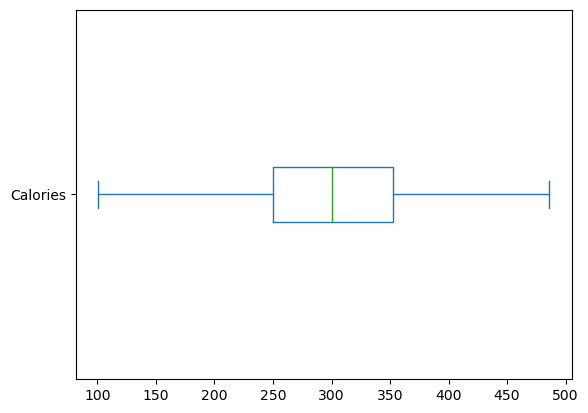

In [63]:
selecao = (df_data.Calories > 100) & (df_data.Calories < 500)
df_data.Calories[selecao].plot.box(vert=False)

### 4. Criar uma variavel de datas no intevalo entre Novembro e Dezembro, basiada na Week.

In [64]:
s_week = df_data.Week

In [65]:
# Methodo unique
type(s_week.unique())

numpy.ndarray

In [66]:
# methodo drop_duplicates
type(s_week.drop_duplicates()) # inplace=True

pandas.core.series.Series

In [67]:
df_week = df_data[["Week", "Name"]].groupby(by=["Week", "Name"])["Name"].count()

In [68]:
# LOC | ILOC

df_week.loc[8] # Semana 8

Name
Charles     4
Clark       1
James       1
Jobs        2
Leonel      1
Louise      2
Mark        1
Megan       1
Nicholas    3
Peter       1
Robert      1
Samantha    1
Susan       1
Name: Name, dtype: int64

In [69]:
df_week.tail()

Week  Name    
8     Nicholas    3
      Peter       1
      Robert      1
      Samantha    1
      Susan       1
Name: Name, dtype: int64

In [70]:
df_data.head(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
0,Robert,1,60,110,130,409.1,33.3,6.8
1,Mark,1,60,117,145,479.0,103.2,8.0


In [71]:
tz="America/Sao_Paulo"

pd.Timestamp.now(tz=tz)

Timestamp('2023-11-10 19:47:03.467397-0300', tz='America/Sao_Paulo')

In [72]:
zonas = pytz.all_timezones_set

In [73]:
# dir(pytz) # Saber methodos e atributos da lib


In [74]:
agora = pd.Timestamp.now(tz=tz)

type(agora)

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
dtu = pd.Timestamp("2023-11-09") # Universal
dta = pd.Timestamp("11/09/2023") # Americano

In [76]:
print(dtu)
print(dta)

2023-11-09 00:00:00
2023-11-09 00:00:00


In [77]:
# dtcv = pd.to_datetime("09112023", format="%d%m%Y")
# dtcv = pd.to_datetime("09/11/2023", format="%d/%m/%y")

In [78]:
# dtcv

In [79]:
nov_dez = pd.date_range(
    start="2023-11-01",
    end="2023-12-31",
    tz=tz
)

In [80]:
nov_dez[0]

Timestamp('2023-11-01 00:00:00-0300', tz='America/Sao_Paulo')

In [81]:
semana_1 = pd.date_range(
    start="2023-11-01",
    periods=7,
    tz=tz
)

In [82]:
[randrange(0,7)]

[1]

In [83]:
semana_1[randrange(0,7)]

Timestamp('2023-11-04 00:00:00-0300', tz='America/Sao_Paulo')

In [84]:
semana_1

DatetimeIndex(['2023-11-01 00:00:00-03:00', '2023-11-02 00:00:00-03:00',
               '2023-11-03 00:00:00-03:00', '2023-11-04 00:00:00-03:00',
               '2023-11-05 00:00:00-03:00', '2023-11-06 00:00:00-03:00',
               '2023-11-07 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', freq='D')

In [85]:
type(semana_1)

pandas.core.indexes.datetimes.DatetimeIndex

In [86]:
# dir(semana_1)

In [87]:
# pd.Timestamp("2023-11-01") + pd.Timedelta(days=7)

In [88]:
def gerar_datas(x):
    data_inicio = pd.Timestamp("2023-11-01")
    
    sem = int(x.Week)
    
    if sem == 2:
        data_inicio += pd.Timedelta(days=7)
    elif sem > 2:
        data_inicio += pd.Timedelta(days=7*sem)
    
    datas = pd.date_range(
        start=data_inicio,
        periods=7,
        tz=tz
    )
    
    return datas[randrange(0,7)].strftime("%d/%m/%Y")
    

In [89]:
df_data["Datas"] = df_data.apply(
    gerar_datas,
    axis=1
)

In [90]:
df_data.tail(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
167,Louise,8,75,120,150,320.4,-55.4,4.3,29/12/2023
168,Jobs,8,75,125,150,330.4,-45.4,4.4,30/12/2023


In [91]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         169 non-null    object 
 1   Week         169 non-null    int64  
 2   Duration     169 non-null    int64  
 3   Pulse        169 non-null    int64  
 4   Maxpulse     169 non-null    int64  
 5   Calories     164 non-null    float64
 6   DMediaGeral  164 non-null    float64
 7   CalsPerMin   164 non-null    float64
 8   Datas        169 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 12.0+ KB


In [92]:
df_data.to_csv("arquivos_gerados/dados_aula04.csv")